<a href="https://colab.research.google.com/github/BNOK/ML-Projects/blob/master/Wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

In [30]:
wine = datasets.load_wine()


In [ ]:
print(wine.DESCR)

Text(0.5, 1.0, 'alcohol and acid distribution')

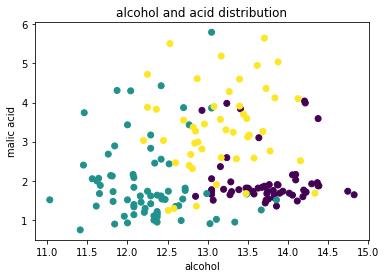

In [33]:
#data vis 
y = wine.target
x = wine.data[:,:2]
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('alcohol')
plt.ylabel('malic acid')
plt.title('alcohol and acid distribution')

Text(0.5, 1.0, 'last two attributes')

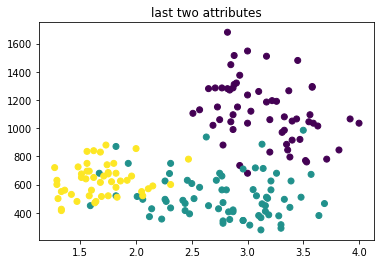

In [34]:
y = wine.target
x = wine.data[:,-2:]
plt.scatter(x[:,0], x[:,1], c=y)

plt.title('last two attributes')

In [35]:
def sigmoid(z):
  return 1.0/(1.0 + math.e ** (-z))


def predict(sample):
  result = 0.0
  for i in range(len(sample)):
    result = result + weights[i]* sample[i]

  result = result + bias 
  return sigmoid(result)


def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

In [36]:
# back propagation algorithm for one epoch 
num_features = wine.data.shape[1]
 
def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0
 
  global bias, weights
 
  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

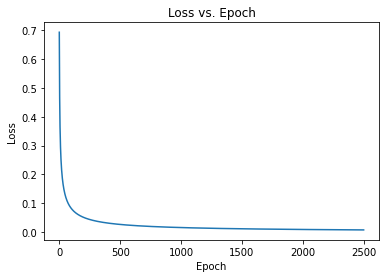

In [38]:
# Model will "learn" values for the weights and biases

 
weights = [0.0] * num_features
bias = 0.0
 
learning_rate = 0.15

epochs = 2500
# These are hyper parameter
# learning_rate = ?
# epochs = ?
 
scaler = StandardScaler()
x_train_samples = scaler.fit_transform(wine.data)
y_train_samples = [1 if y == 0 else 0 for y in wine.target]
 
loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)
 
plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

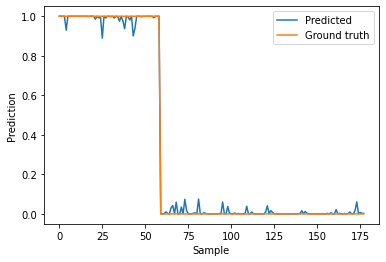

Accuracy: 100.00 %


In [39]:
predictions = []
 
m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0
 
plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()
 
print('Accuracy: %.2f %%' % (100 * correct/m))